# Misure di Frequenze e Rappresentazione Grafica dei Dati
In questa lezione, inizieremo a vedere dei primi strumenti per riassumere le caratteristiche fondamentali dei dati.

## Frequenze Assolute e Relative

### Frequenze Assolute
Un primo modo di descrivere i dati consiste nel calcolare il numero di volte in cui ciascun valore appare. Queste sono chiamate "frequenze assolute". Le frequenze assolute sono in genere calcolate per variabili discrete in cui le osservazioni assumono un numero finito di valori. 

Siano 

$$a_1, a_2, \ldots, a_3$$ 

i valori che la variabile in considerazione può assumere. 

Le frequenze assolute $n_i$ sono definite come il numero di volte che $a_i$ appare nel campione. Si noti che:

$$\sum_i n_i = n$$

Dove $n$ è il numero totale di elementi nel campione.

#### Esempi

Consideriamo un semplice campione di 10 pazienti per i quali sono stati rilevati dei dati. Consideriamo una variabile `gender` che indica il genere dei pazienti:

In [32]:
import pandas as pd
data = pd.Series(['M','F','M','M','M','F','F','F','F','F'])
data

0    M
1    F
2    M
3    M
4    M
5    F
6    F
7    F
8    F
9    F
dtype: object

I valori univoci in questo semplici esempi saranno due:

In [33]:
pd.Series(data.unique())

0    M
1    F
dtype: object

Le frequenze assolute del campione in oggetto sono riassunte nella tabella seguente:

In [35]:
data.value_counts()

F    6
M    4
dtype: int64

Consideriamo un dataset un po' più complesso, contenente pesi (in libbre), altezze (in pollici) e sesso di diversi soggetti. Il dataset avrà il seguente aspetto:

In [ ]:
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')
hw['height'] = (hw['height']/2.54).astype(int)
hw['weight'] = hw['weight']/2.205
del hw['BMI']
hw

,sex,height,weight
0,M,74,53.484771
1,M,70,38.056472
2,F,61,34.970812
3,M,68,35.999365
4,F,66,34.559390
...,...,...,...
4226,F,69,23.862436
4227,M,69,38.262182
4228,F,64,34.970812
4229,F,64,28.388071


Notiamo che i valori delle altezze sono quantizzate. I valori univoci in questo caso saranno i seguenti:

In [ ]:
hw['height'].unique()

array([74, 70, 61, 68, 66, 65, 64, 67, 72, 71, 76, 69, 63, 75, 60, 59, 73])

Le frequenze assolute in questo caso saranno le seguenti:

In [30]:
hw['height'].value_counts().sort_index()

59     52
60    130
61    411
63    291
64    435
65    351
66    391
67    377
68    355
69    302
70    272
71    235
72    260
73    146
74    104
75     72
76     47
Name: height, dtype: int64

#### Diagramma a Barre delle Frequenze Assolute
Le frequenze dei dati possono essere rappresentate graficamente mediante un diagramma a barre che pone sull'asse delle $x$ il valore univoco ($a_i$) e che rappresenta la frequenza assoluta $n_i$ come altezza della barra. 

##### Esempi
Nel caso del campione `gender`:


<AxesSubplot:>

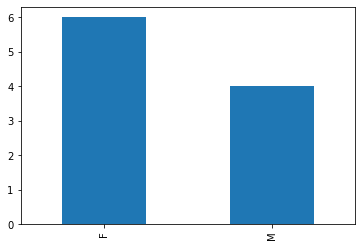

In [36]:
data.value_counts().plot.bar()

Il diagramma a barre delle frequenze assolute delle altezze nel nostro campione di pesi e altezze è il seguente:

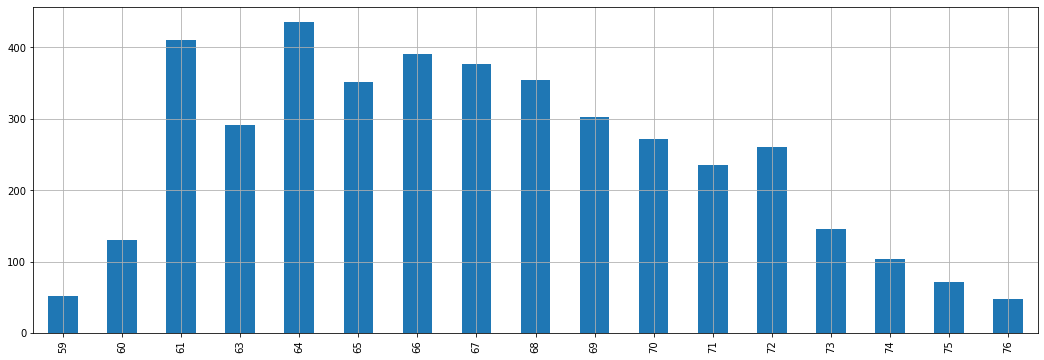

In [37]:
from matplotlib import pyplot as plt
hw['height'].value_counts().sort_index().plot.bar(figsize=(18,6))
plt.grid()
plt.show()

Il grafico sopra ci dice qualcosa sul numero di occorrenze di un dato valore e ci da anche una idea di quali valori siano più o meno frequenti. Vediamo che i dati seguono una forma "a campana". Troveremo spesso questo tipo di forma e ne parleremo meglio in seguito.

### Frequenze Relative
Le frequenze assolute ci permettono di farci un'idea più precisa su come i dati sono distribuiti, indipendentemente dalla dimensione del nostro campione. Sappiamo ad esempio che il campione contiene più individui di altezza pari a $167.64\ cm$ che individui di altezza pari a $193.04\ cm$. Tuttavia, tale rappresentazione è legata al numero totale di elementi contenuti nel campione. Ad esempio, un campione distribuito in maniera simile, ma con più osservazioni, darà luogo a frequenze assolute più grandi. Possiamo ottenere una rappresentazione indipendente rispetto alla dimensione del campione mediante l'analisi delle frequenze relative, definite come seguono:

$$f_j = f(a_j) = \frac{n_j}{n}, j=1,2,\ldots,k$$

Si noti che, vista la definizione, si avrà:

$$ n_j \leq n \Rightarrow f_j \leq 1\ \forall j $$

$$ \sum_j f_j = \sum_j \frac{n_j}{n} = \frac{1}{n}\sum_j n_j = \frac{n}{n} = 1$$

#### Esempi
Nel caso del nostro piccolo campione `gender` avremo:

In [38]:
data.value_counts(normalize=True)

F    0.6
M    0.4
dtype: float64

Nel caso del nostro dataset di altezze, avremo:

In [39]:
hw['height'].value_counts(normalize=True).sort_index()

59    0.012290
60    0.030726
61    0.097140
63    0.068778
64    0.102813
65    0.082959
66    0.092413
67    0.089104
68    0.083905
69    0.071378
70    0.064287
71    0.055542
72    0.061451
73    0.034507
74    0.024580
75    0.017017
76    0.011108
Name: height, dtype: float64

È possibile verificare che tutti i numeri sono compresi tra zero e uno e che la somma dei valori è pari a 1. 

Sebbene parleremo meglio di probabilità in seguito, questo tipo di rappresentazione può essere già utilizzata con una connotazione probabilistica.
In particolare, questa rappresentazione è chiamata anche **probability mass function (PMF)** e associa ad **ogni valore discreto** presente nel campione una **probabilità**. Possiamo ad esempio dire che la probabilità di trovare un individuo di altezza $67 inches$ (circa $170.18 cm$) è pari a $0.089104$.

#### Diagramma a Barre delle Frequenze Relative
Plottando le frequenze relative con un diagramma a barre, otteniamo un grafico molto simile a quello delle frequenze relative, ma con una differente scala sull'asse delle $y$.

##### Esempi

Nel caso del campione `gender` avremo:

<AxesSubplot:>

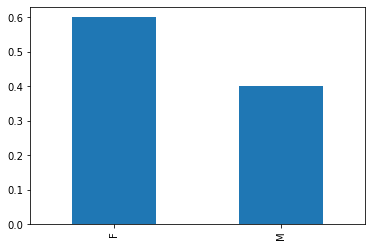

In [41]:
(data.value_counts(normalize=True).sort_index()).plot.bar()

Nel caso del campione pesi-altezze, avremo:

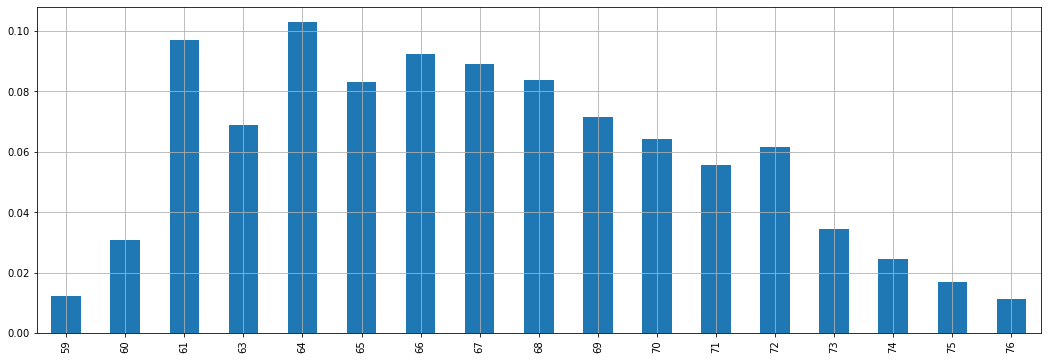

In [43]:
(hw['height'].value_counts(normalize=True).sort_index()).plot.bar(figsize=(18,6))
plt.grid()
plt.show()

I diagrammi a barre delle frequenze relative sono utili per confrontare tra di loro campioni diversi. Ad esempio, possiamo considerare le altezze di uomini e donne nel dataset pesi-altezze:

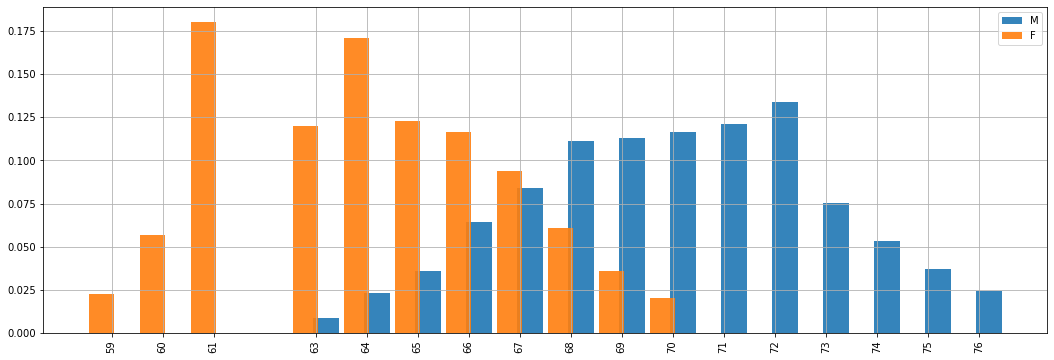

In [56]:
pmf_height_m = hw[hw['sex']=='M']['height'].value_counts(normalize=True).sort_index()
pmf_height_f = hw[hw['sex']=='F']['height'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(18,6))
#sommiamo e sottraiamo 0.2 agli indici per "spostare" le barre e renderle
#visibili quando sovrappose. Inoltre impostiamo alpha=0.9 per rendere le barre
#parzialmente trasparenti
plt.bar(pmf_height_m.index+0.2, pmf_height_m.values, width=0.5, alpha=0.9)
plt.bar(pmf_height_f.index-0.2, pmf_height_f.values, width=0.5, alpha=0.9)
plt.xticks(hw['height'].unique(), rotation='vertical')
plt.legend(['M','F']) #mostriamo una legenda
plt.grid()
plt.show()

Dal confronto sopra, possiamo già fare delle considerazioni qualitative sui due campioni. In particolare notiamo (poco sorprendentemente) che gli uomini sono generalmente più alti delle donne. Ciò non vuol dire che non esistano uomini più bassi di alcune donne o viceversa, ma ragionevolmente si tratta di casi meno frequenti.

#### Grafici a Torta
In alternativa ai grafici a barre, le frequenze relative possono essere visualizzate anche mediante dei grafici a torta.

##### Esempi
Nel caso del campione `gender`:

<AxesSubplot:ylabel='None'>

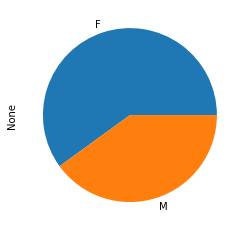

In [45]:
data.value_counts(normalize=True).plot.pie()

Nel caso del campione pesi-altezze:

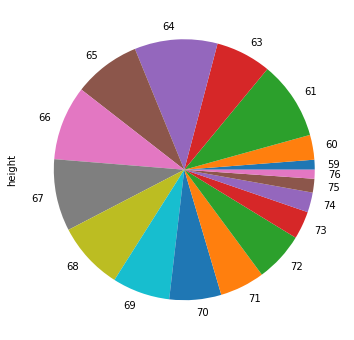

In [44]:
(hw['height'].value_counts(normalize=True).sort_index()).plot.pie(figsize=(18,6))
plt.show()

## Empirical Cumulative Distribution Function (ECDF)

Le frequenze relative funzionano particolarmente bene quando i valori unici sono pochi. Quando invece il numero di valori univoci cresce, le frequenze discrete calcolate per i valori diventano molto piccole e dunque soggette a rumore (ad esempio dovuto ad errori di misura). 

Torniamo al nostro esempio di dataset di pesi e altezze:

In [46]:
hw

,sex,height,weight
0,M,74,53.484771
1,M,70,38.056472
2,F,61,34.970812
3,M,68,35.999365
4,F,66,34.559390
...,...,...,...
4226,F,69,23.862436
4227,M,69,38.262182
4228,F,64,34.970812
4229,F,64,28.388071


I valori dei pesi, a differenza di quelli delle altezze, non sono quantizzati. Un grafico a barre delle frequenze relative (o Probability Mass Function) avrebbe questo aspetto:

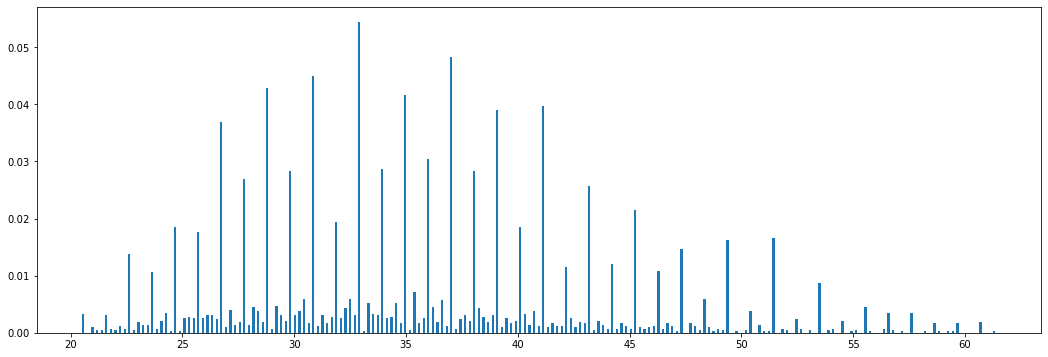

In [76]:
hist=hw['weight'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(18,6))
plt.bar(hist.index,hist.values, width=.1)
plt.show()

Come possiamo notare, abbiamo ottenuto una rappresentazione grafica più "rumorosa". Supponiamo adesso di voler confrontare le distribuzioni dei pesi di donne e uomini:

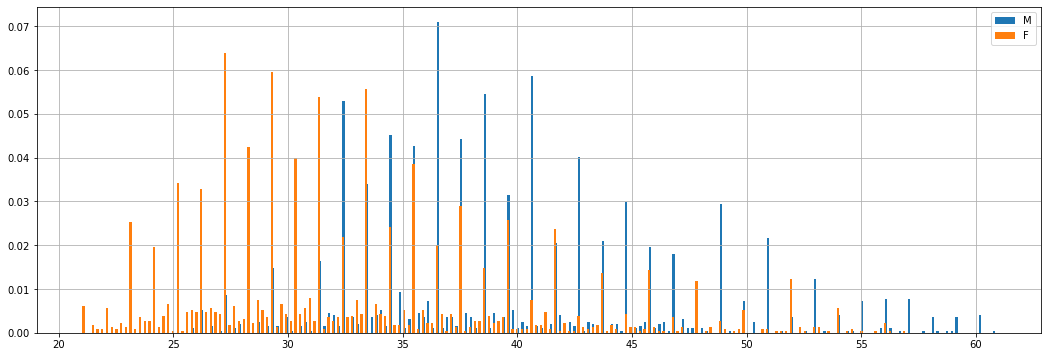

In [75]:
pmf_weight_m = hw[hw['sex']=='M']['weight'].value_counts(normalize=True).sort_index()
pmf_weight_f = hw[hw['sex']=='F']['weight'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(18,6))
plt.bar(pmf_weight_m.index-0.5, pmf_weight_m.values, width=.1)
plt.bar(pmf_weight_f.index+0.5, pmf_weight_f.values, width=.1)
plt.legend(['M','F'])
plt.grid()
plt.show()

Le due rappresentazioni sono affette da rumore dovuto alla natura discreta dei dati per cui due valori molto vicini vengono trattati come due casi distinti nel calcolo delle probabilità. Vedremo alcuni modi per ovviare a questo problema. Uno di essi consiste nel calcolare una **Empirical Cumulative Distribution Function (ECDF)**. Una **ECDF** calcola per un valore $x$ la somma delle frequenze relative di tutti i valori $y$ minori o uguali a $x$:

$$ECDF(x) = \sum_{a_j: a_j\leq x} f(a_j)$$

Dove $a_j$ sono i valori univoci all'interno del campione, mentre in generale $x\in \mathbb{R}$.

Consideriamo un semplice dataset di valori numerici:

In [81]:
a=pd.Series([1,5,2,6,5,4,3,5,4,2,4,5,6,4,4,3])
a

0     1
1     5
2     2
3     6
4     5
5     4
6     3
7     5
8     4
9     2
10    4
11    5
12    6
13    4
14    4
15    3
dtype: int64

Le frequenze relative saranno le seguenti:

In [84]:
a.value_counts(normalize=True).sort_index()

1    0.0625
2    0.1250
3    0.1250
4    0.3125
5    0.2500
6    0.1250
dtype: float64

La ECDF calcolata sui valori univoci sarà la seguente:

In [85]:
a.value_counts(normalize=True).sort_index().cumsum()

1    0.0625
2    0.1875
3    0.3125
4    0.6250
5    0.8750
6    1.0000
dtype: float64

Da notare che i valori della ECDF sono sempre crescenti e l'ultimo valore è pari a 1 (la somma di tutte le frequenze relative).

Una ECDF può essere rappresentata graficamente mettendo i valori di $x$ sulle ascisse e i valori di $ECDF(x)$ sulle ordinate. Ad esempio, la ECDF dei pesi nel nostro dataset di pesi-altezze sarà la seguente:

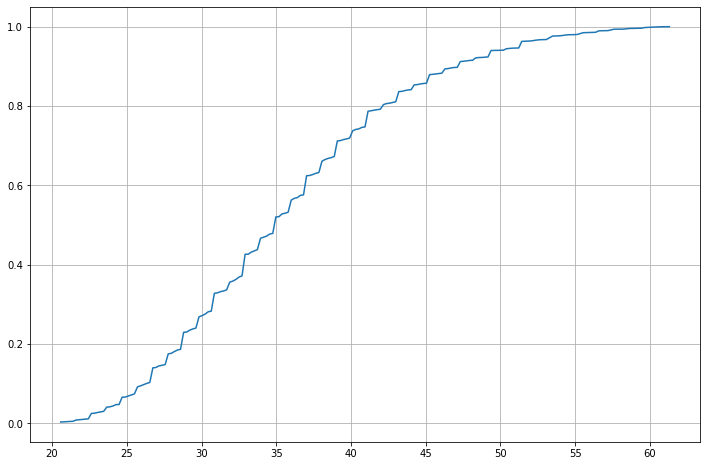

In [88]:
hw['weight'].value_counts(normalize=True).sort_index().cumsum().plot(figsize=(12,8))
plt.grid()

La definizione della ECDF ci dice che, dato un punto di coordinate $(x,y)$, la somma delle frequenze degli elementi minori o uguali a $x$ è pari a $y$. Alternativamente, possiamo dire che l'$y\%$ degli elementi ha un valore inferiore a $x$.

Osservando il grafico sopra, possiamo dire che:
* Circa il $40\%$ dei soggetti ha un peso inferiore alle $\approx 33$ libre (circa $66kg$);
* Circa l'$80\%$ dei soggetti ha un peso inferiore $\approx 42$ libre (circa $84Kg$);

Le ECDF tornano utili per verificare graficamente se due fenomeni hanno distribuzioni simili. Possiamo ad esempio usarle per confrontare le distribuzioni dei pesi di uomini e donne:

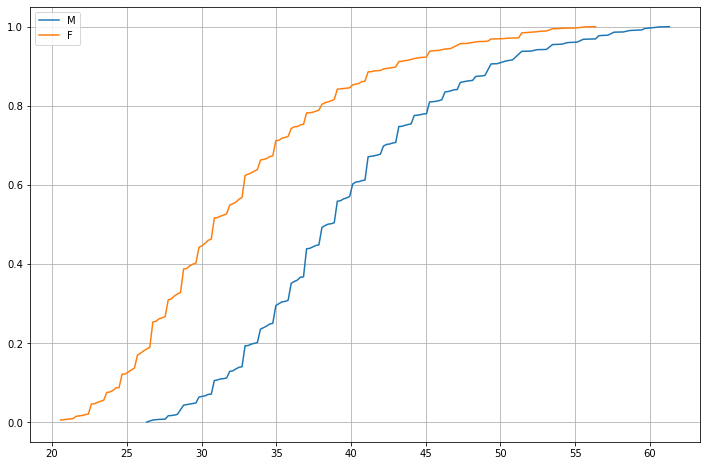

In [90]:
ecdf_weight_m = hw[hw['sex']=='M']['weight'].value_counts(normalize=True).sort_index().cumsum()
ecdf_weight_f = hw[hw['sex']=='F']['weight'].value_counts(normalize=True).sort_index().cumsum()

plt.figure(figsize=(12,8))
plt.plot(ecdf_weight_m.index, ecdf_weight_m.values)
plt.plot(ecdf_weight_f.index, ecdf_weight_f.values)
plt.legend(['M','F'])
plt.grid()
plt.show()

Osservando il grafico sopra, possiamo dire che:
* Circa il $40\%$ degli uomini ha un peso inferiore agli $80Kg$;
* Circa il $40\%$ delle donne ha un peso inferiore ai $60Kg$;
* Il $100\%$ degli uomini ha un peso inferiore ai $140Kg$;
* Il $100\%$ delle donne ha un peso inferiore ai $130Kg$.

In generale, il grafico sopra ci dice che gli uomini tendono a essere più pesanti delle donne.

## Istogrammi

Abbiamo visto che i diagrammi a barre delle frequenze diventano poco chiari quando le variabili sono continue (es. nel caso dei pesi). In questi casi, per ridurre l'influenza del rumore, è possibile utilizzare gli istogrammi. Un istogramma divide il range dei dati in un certo numero di "bin" e riporta per ogni bin il numero di valori che ricadono in quell'intervallo. Di seguito l'istogramma dei pesi nel dataset pesi-altezze:

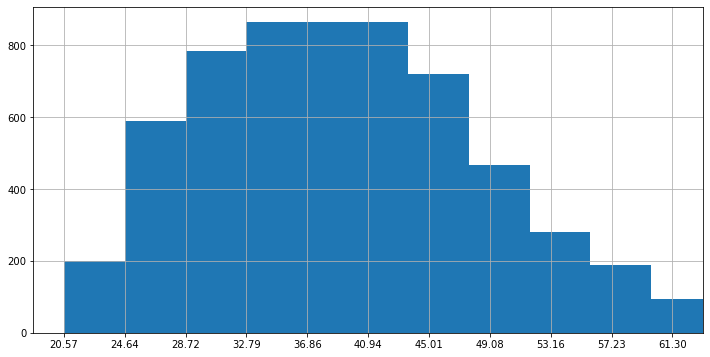

In [91]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(hw['weight'], width=10.8)
plt.xticks(edges)
plt.grid()
plt.show()

Ogni "bin" dell'istogramma copre un determinato range. Pratica comune è quella di suddividere il range dei dati, dal minimo al massimo, in un determinato numero di bin della stessa larghezza.

#### Scegliere il numero di bin: Struges e Rice

Il numero di bin può essere specificato arbitrariamente o determinato a seconda del risultato grafico che si vuole ottenere. Esistono due criteri euristici per trovare dei valori di partenza:

* Struges: $\#bins=3.3\log(n)$ 
* Rice: $\#bins=2\cdot n^{1/3}$ 

Dove $n$ è il numero di elementi.

Va notato che il numero di bin, può cambiare il risultato grafico. Di seguito due esempi ottenuti calcolando il numero di bin con i due criteri considerati:

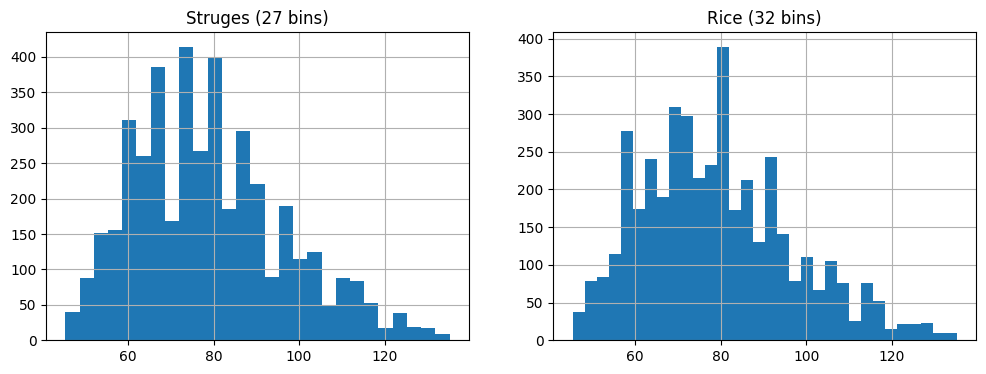

In [34]:
import numpy as np
bins_struges=int(3.3*np.log(len(data['weight'])))
bins_rice=int(2*len(data['weight'])**(1/3))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Struges ({} bins)'.format(bins_struges))
plt.hist(data['weight'], bins=bins_struges)
plt.grid()
plt.subplot(1,2,2)
plt.title('Rice ({} bins)'.format(bins_rice))
plt.grid()
plt.hist(data['weight'], bins=bins_rice)
plt.show()

Alternativamente, possiamo definire dei range arbitrari per i nostri bin. Ad esempio, considerando i seguenti limiti per i bin `[20,25,30,35,40,45,50,55,60,65]`, otterremmo il seguente istogramma:

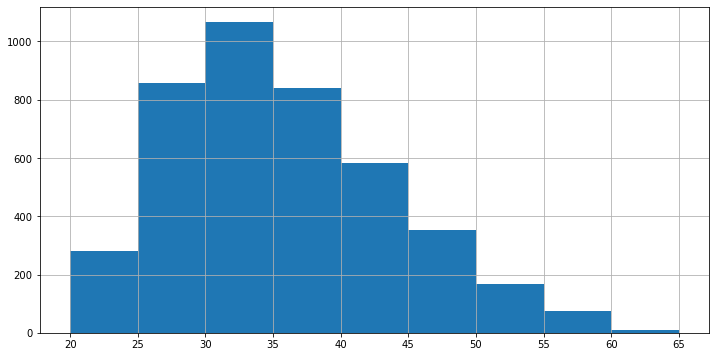

In [110]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(hw['weight'], bins=[20,25,30,35,40,45,50,55,60,65]) #costruiamo un istogramma con i bin definiti
plt.xticks(edges)
plt.grid()
plt.show()

L'istogramma mostrato sopra riporta le frequenze assolute per ogni bin e ci permette di rispondere a domande del genere "quanti soggetti hanno un peso compreso tra $30$ e $35$ libbre"?

In casi particolari, è possibile anche definire istogrammi con bin di dimensioni variabili. Ad esempio:

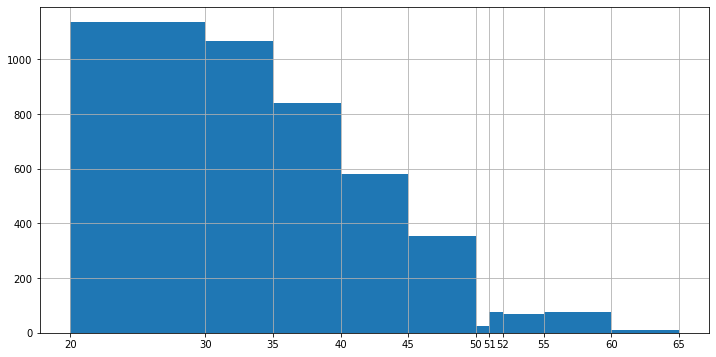

In [109]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(hw['weight'], bins=[20,30,35,40,45,50,51,52,55,60,65]) #costruiamo un istogramma con i bin definiti
plt.xticks(edges)
plt.grid()
plt.show()

### Istogrammi di densità
Un istogramma può essere utilizzato anche per approssimare una Probability Density Function (ne parleremo meglio più in là). L'istogramma delle frequenze assolute mostrato sopra, tuttavia, non ci permette di ragionare in termini probabilistici. 

Ad esempio, non ci permette di dire qual è la probabilità che un soggetto abbia un peso contenuto tra $30$ e $40$ libbre. Se avessimo la PDF della popolazione dalla quale è stata estratto il campione, potremmo rispondere a questa domanda calcolando l'integrale:

$$
\int_{30}^{40} pdf(x) dx
$$

Possiamo costruire un **istogramma di densità**, che approssimi in maniera discreta la PDF che cerchiamo. In pratica, vogliamo che l'area sottesa dal bin di "bordi" $[30, 40[$ contenga un valore che approssimi l'integrale della PDF:  

$$
\int_{30}^{40} pdf(x) dx \approx b_j \cdot w_j
$$

dove $j$ indica il bin di bordi $[30, 40[$, $w_j$ rappresenta la sua larghezza ($40-30=10$) e $b_j$ rappresenta la sua altezza (il valore del bin). Sotto queste condizioni, vale dunque la seguente proprietà:

$$
\sum_{i=0}^{n} b_i \cdot w_i = \int pdf(x) dx = 1
$$

dove $n$ è il numero totale di bin.

Il risultato è graficamente molto simile a quello ottenuto in precedenza, ma cambia la scala sull'asse delle y:

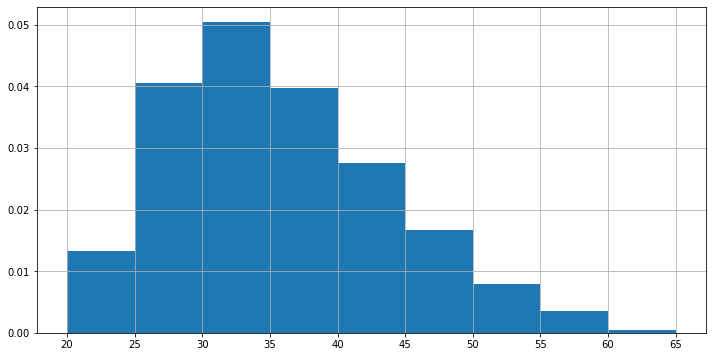

In [111]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(hw['weight'], bins=[20,25,30,35,40,45,50,55,60,65], density=True) #costruiamo un istogramma con i bin definiti
plt.xticks(edges)
plt.grid()
plt.show()

### Stima della densità
Uno svantaggio degli istogrammi è che categorizzano dei dati continui in maniera arbitraria mediante dei bin. La scelta degli intervalli dei bin cambia l'aspetto finale dell'istogramma. 

La stima della densità cerca di risolvere questo problema ottenendo una versione "continua" dell'istogramma. Invece di suddividere l'asse delle $x$ in bin, la stima della densità calcola un valore per ciascun punto dell'asse delle $x$, ottenendo così una rappresentazione continua. Il calcolo avviene mediante la seguente formula:

$$\hat f_n(x)=\frac{1}{nh}\sum_{i=1}^n K(\frac{x-x_i}{h}), h>0$$

Dove $n$ è la dimensione del campione, $h$ è un parametro detto "bandwidth" e $K$ è una funzione "kernel" che determina quanto gli elementi del campione devono contribuire alla stima nel punto $x$, dipendentemente dalla loro distanza da $x$. Una scelta comune di kernel è quello di Epanechnikov:

$$
K(x) = \begin{cases}
\frac{3}{4}(1-x^2) & \text{if } |x| \leq 1 \\
    0 & \text{otherwise.}
\end{cases}
$$

In pratica il Kernel di Epanechnikov ha la seguente forma:

(-4.0, 4.0)

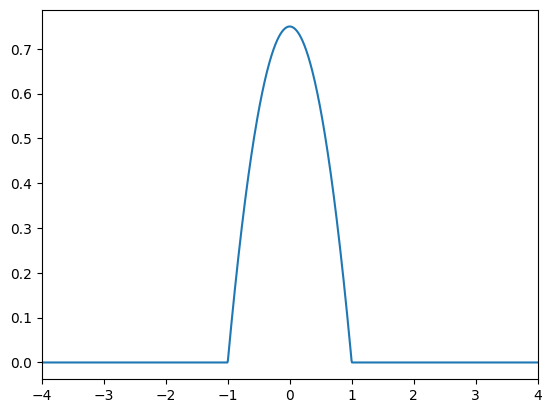

In [26]:
import numpy as np
x = np.linspace(-4,4,1000)
y = 3/4*(1-x**2)
y[abs(x)>1] = 0
plt.plot(x, y)
plt.xlim([-4,4])

Facendo "scorrere" questo kernel su diversi punti dell'asse delle x e sommando i contributi, si ottiene la stima di densità finale:

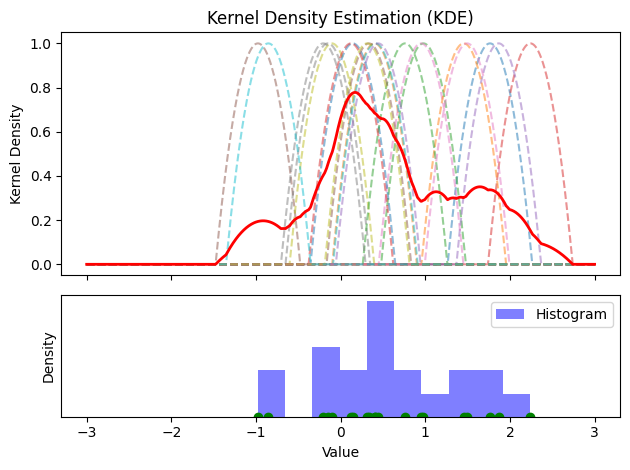

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fewer random data points
np.random.seed(0)
data = np.random.normal(0, 1, 20)

# Create a range of x values for plotting
x = np.linspace(-3, 3, 1000)

# Bandwidth for the Epanechnikov kernel
bandwidth = 0.5

# Initialize arrays to store the kernel contributions and the kernel density estimate
kernel_contributions = np.zeros_like(x)
kernel_density_estimate = np.zeros_like(x)

# Create subplots with separate y-axes
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

# Plot individual kernels centered at data points
for xi in data:
    # Calculate the Epanechnikov kernel at xi
    kernel_values = (1 / (2 * bandwidth)) * (1 - ((x - xi) / bandwidth) ** 2) * (np.abs(x - xi) <= bandwidth)
    
    # Add the kernel contribution to the array
    kernel_contributions += kernel_values
    
    # Plot the individual kernel on the upper subplot
    ax1.plot(x, kernel_values, linestyle='--', label=f'Kernel at Data Point {xi:.2f}', alpha=0.5)

# Calculate the kernel density estimate
kernel_density_estimate = kernel_contributions / (len(data) * bandwidth)

# Plot the kernel density estimate on the upper subplot
ax1.plot(x, kernel_density_estimate, color='red', linewidth=2, label='Kernel Density Estimate')

# Add labels and a legend to the upper subplot
ax1.set_ylabel('Kernel Density')
ax1.set_title('Kernel Density Estimation (KDE)')
#ax1.legend()

# Plot the histogram of the data in the lower subplot
hist_values, bins, _ = ax2.hist(data, bins=10, density=True, alpha=0.5, color='blue', label='Histogram')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

# Create a subplot for data points (shared x-axis with the lower subplot)
ax2.scatter(data, np.zeros_like(data), marker='o', color='green', label='Data Points')
ax2.set_yticks([])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Confrontiamo la stima di densità dei pesi nel nostro dataset di pesi-altezze con il relativo istogramma:

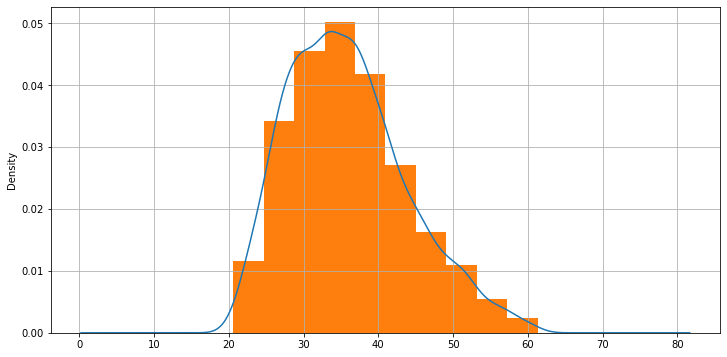

In [118]:
hw['weight'].plot.density(figsize=(12,6))
plt.hist(hw['weight'], density=True)
plt.grid()
plt.show()

Se nel caso degli istogrammi cambiare il numero di bin cambiava il risultato grafico, qui è cambiare la bandwidth a cambiare il risultato grafico. Il grafico seguente mostra diversi esempi di stima di densità con diversi valori di bandwidth:

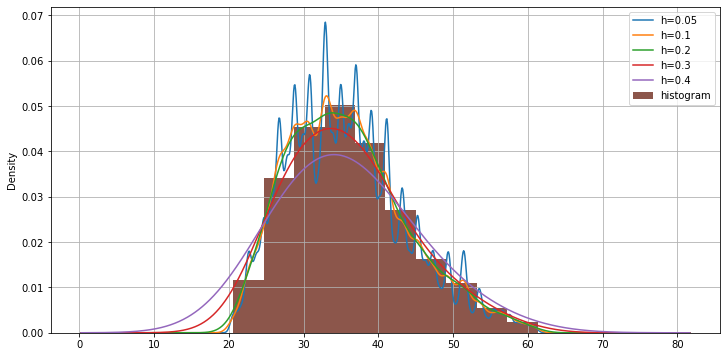

In [138]:
fig, ax = plt.subplots()
hw['weight'].plot.density(figsize=(12,6), bw_method=0.05)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.1)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.2)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.5)
hw['weight'].plot.density(figsize=(12,6), bw_method=0.8)
plt.hist(hw['weight'], density=True)
ax.legend(['h=0.05','h=0.1','h=0.2','h=0.3','h=0.4','histogram'])
plt.grid()
plt.show()

### Confrontare campioni mediante istogrammi

Gli istogrammi possono essere utili per comparare campioni. In grafico che segue confronta i pesi di uomini e donne nel nostro campione pesi-altezze:

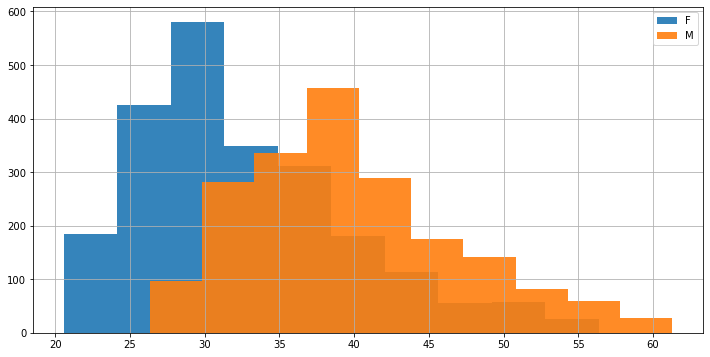

In [143]:
plt.figure(figsize=(12,6))
plt.hist(hw[hw['sex']=='F']['weight'], alpha=0.9)
plt.hist(hw[hw['sex']=='M']['weight'], alpha=0.9)
plt.legend(['F','M'])
plt.grid()
plt.show()

## Referenze

* Capitolo 2 di: Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.